### **Escolha do Problema**
**Objetivo do Trabalho**  
O objetivo principal deste projeto é prever se um lançamento resultará em cesto ou não, com base nas coordenadas de lançamento e outras características associadas aos lançamentos na WNBA. Este é um problema de classificação, pois a variável alvo é categórica (cesto ou não).

**Classificação:**
1. **Natureza da Variável Alvo**:
   - A variável alvo é categórica (binária), indicando se o lançamento foi bem-sucedido (`1`) ou não (`0`).
   - A tarefa de classificação é apropriada para prever categorias discretas.

2. **Exploração de Fatores Determinantes**:
   - Utilizar técnicas de classificação permite compreender quais características, como posição do lançamento, distância e ângulo, influenciam diretamente no sucesso do arremesso.
   - Isso auxilia na identificação de padrões de sucesso, podendo gerar insights úteis para treinamento ou estratégia de jogo.

Essa abordagem é consistente com os objetivos de análise preditiva em esportes e pode fornecer insights interpretáveis com o uso de técnicas de inteligência artificial explicável (XAI).

### Imports

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [188]:
df = pd.read_csv('wnba-shots-2021.csv')
df.head()

,game_id,game_play_number,desc,shot_type,made_shot,shot_value,coordinate_x,coordinate_y,shooting_team,home_team_name,away_team_name,home_score,away_score,qtr,quarter_seconds_remaining,game_seconds_remaining
0,401391650,4,Shatori Walker-Kimbrough blocks Destanni Hende...,Jump Shot,False,0,37,9,Indiana,Washington,Indiana,0,0,1,571,2371
1,401391650,7,Elena Delle Donne misses two point shot,Turnaround Bank Jump Shot,False,0,12,0,Washington,Washington,Indiana,0,0,1,551,2351
2,401391650,9,Tiffany Mitchell makes 4-foot layup (Destanni ...,Cutting Layup Shot,True,2,29,2,Indiana,Washington,Indiana,0,2,1,538,2338
3,401391650,10,Natasha Cloud makes driving layup,Driving Layup Shot,True,2,22,0,Washington,Washington,Indiana,2,2,1,524,2324
4,401391650,11,Tiffany Mitchell makes 26-foot three point jum...,Jump Shot,True,3,9,21,Indiana,Washington,Indiana,2,5,1,512,2312


In [189]:
print("Informações do Dataset:")
print(df.info())

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41497 entries, 0 to 41496
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   game_id                    41497 non-null  int64 
 1   game_play_number           41497 non-null  int64 
 2   desc                       41497 non-null  object
 3   shot_type                  41497 non-null  object
 4   made_shot                  41497 non-null  bool  
 5   shot_value                 41497 non-null  int64 
 6   coordinate_x               41497 non-null  int64 
 7   coordinate_y               41497 non-null  int64 
 8   shooting_team              41497 non-null  object
 9   home_team_name             41497 non-null  object
 10  away_team_name             41497 non-null  object
 11  home_score                 41497 non-null  int64 
 12  away_score                 41497 non-null  int64 
 13  qtr                        41497 non-

In [190]:
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
game_id                      0
game_play_number             0
desc                         0
shot_type                    0
made_shot                    0
shot_value                   0
coordinate_x                 0
coordinate_y                 0
shooting_team                0
home_team_name               0
away_team_name               0
home_score                   0
away_score                   0
qtr                          0
quarter_seconds_remaining    0
game_seconds_remaining       0
dtype: int64


In [191]:
print("\nDuplicados:", df.duplicated().sum())


Duplicados: 0


## Exploração e Visualização dos dados

### Distribuições

#### Distribuição da variável alvo

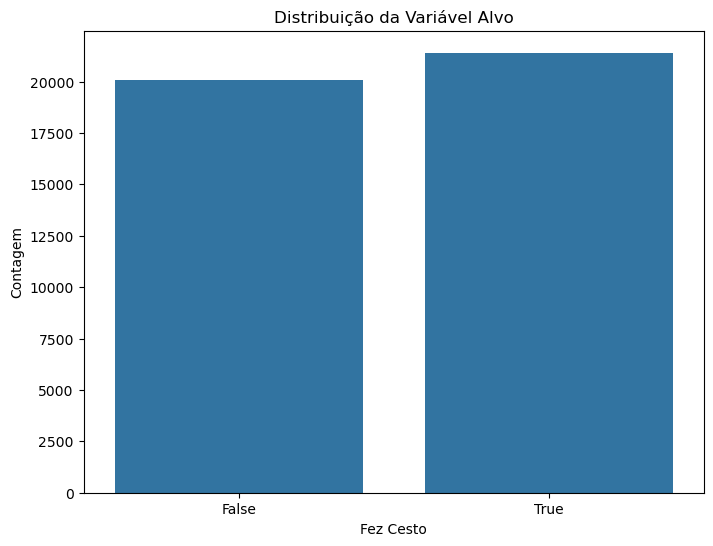

In [192]:
plt.figure(figsize=(8, 6))
sns.countplot(x='made_shot', data=df)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Fez Cesto')
plt.ylabel('Contagem')
plt.show()

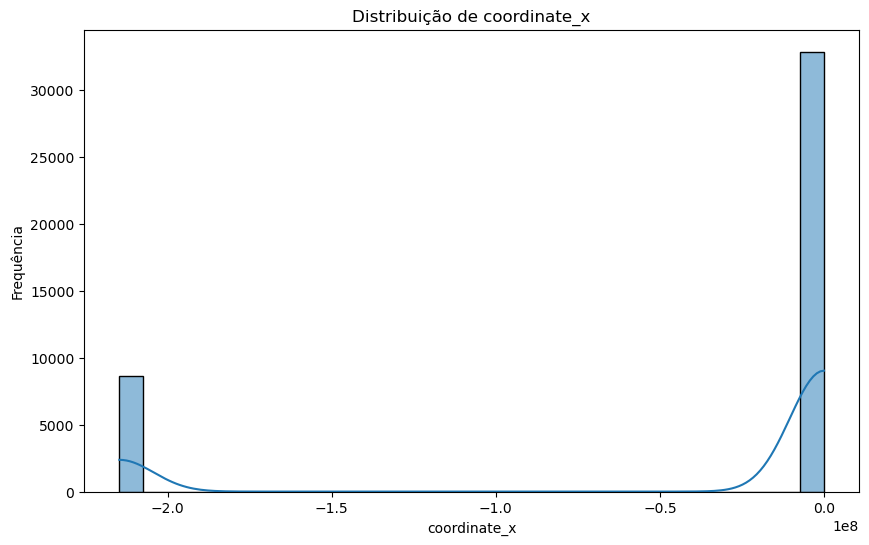

In [193]:
plt.figure(figsize=(10, 6))
sns.histplot(df['coordinate_x'], bins=30, kde=True)
plt.title('Distribuição de coordinate_x')
plt.xlabel('coordinate_x')
plt.ylabel('Frequência')
plt.show()

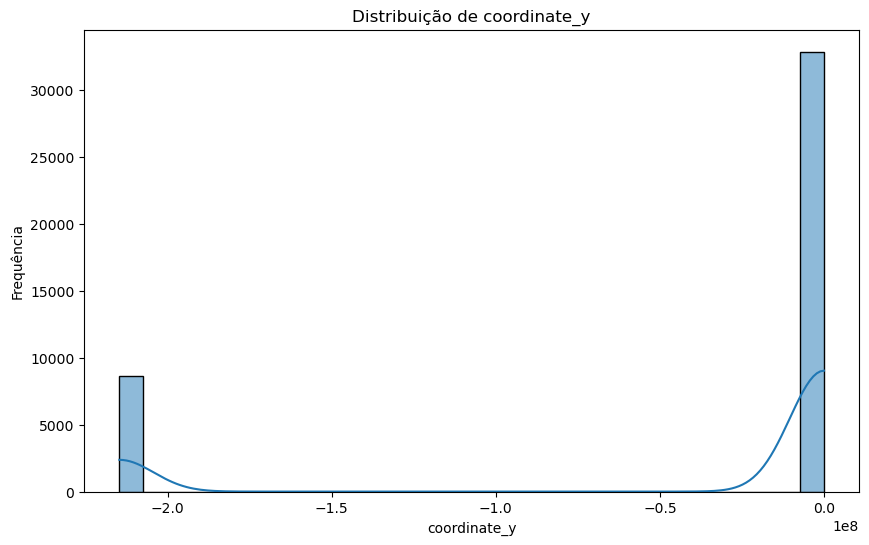

In [194]:
plt.figure(figsize=(10, 6))
sns.histplot(df['coordinate_y'], bins=30, kde=True)
plt.title('Distribuição de coordinate_y')
plt.xlabel('coordinate_y')
plt.ylabel('Frequência')
plt.show()

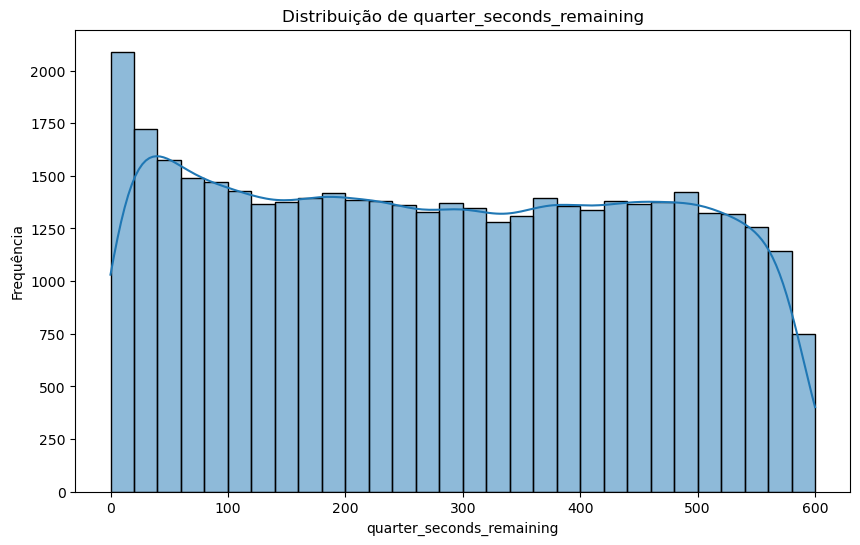

In [195]:
plt.figure(figsize=(10, 6))
sns.histplot(df['quarter_seconds_remaining'], bins=30, kde=True)
plt.title('Distribuição de quarter_seconds_remaining')
plt.xlabel('quarter_seconds_remaining')
plt.ylabel('Frequência')
plt.show()

In [196]:
df['distance_to_hoop'] = np.sqrt(df['coordinate_x']**2 + df['coordinate_y']**2)

bins = [0, 5, 10, 15, 20, 25, 30, 35]  # Intervalos de distância em pés/metros
df['distance_bin'] = pd.cut(df['distance_to_hoop'], bins=bins, labels=bins[:-1])
accuracy_by_distance = df.groupby('distance_bin')['made_shot'].mean()

/var/folders/vl/y_41x5_50d55msx55mh9_lk00000gn/T/ipykernel_92955/2954227165.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accuracy_by_distance = df.groupby('distance_bin')['made_shot'].mean()


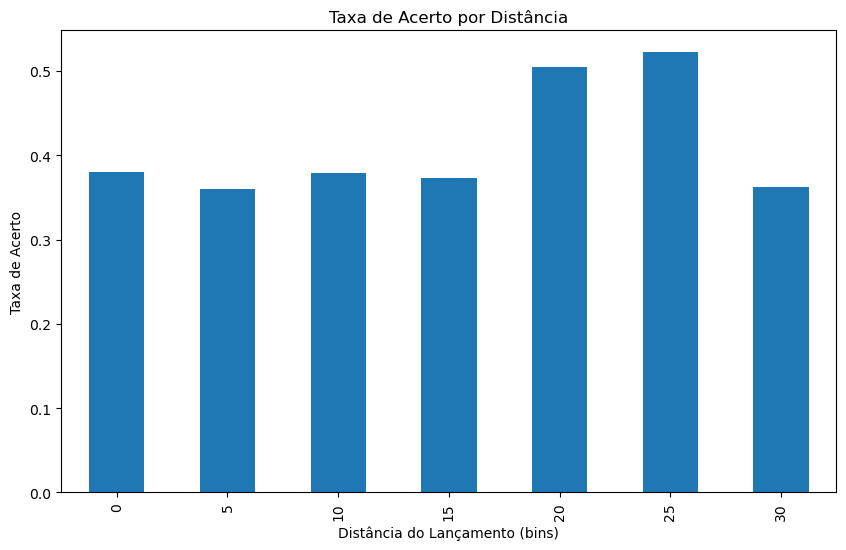

In [197]:
plt.figure(figsize=(10, 6))
accuracy_by_distance.plot(kind='bar')
plt.title('Taxa de Acerto por Distância')
plt.xlabel('Distância do Lançamento (bins)')
plt.ylabel('Taxa de Acerto')
plt.show()

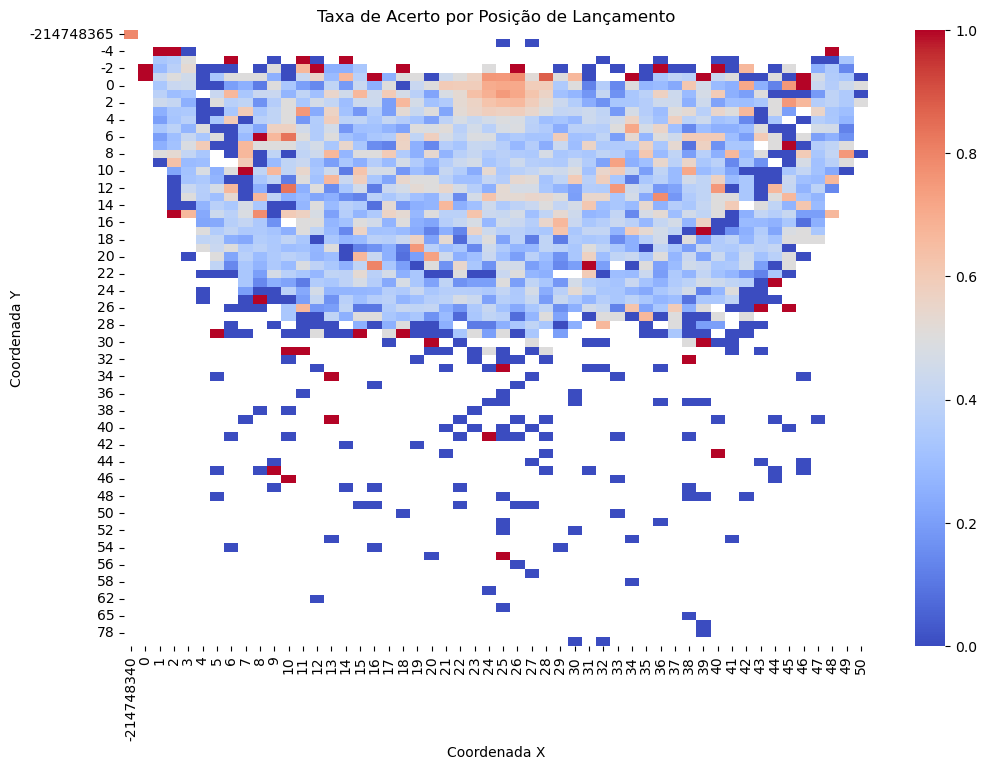

In [198]:
heatmap_data = df.pivot_table(index='coordinate_y', columns='coordinate_x', values='made_shot', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0.5)
plt.title('Taxa de Acerto por Posição de Lançamento')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

## Tratamento de Dados

### Normalização

In [ ]:
# Selecionar as colunas contínuas para escalar
continuous_columns = ['coordinate_x', 'coordinate_y']

# Criar o transformador de colunas para escalar as variáveis contínuas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns)
    ],
    remainder='passthrough'  # Manter as outras colunas inalteradas
)

# Ajustar e transformar os dados
df_scaled = preprocessor.fit_transform(df)

# Converter o resultado de volta para um DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=continuous_columns + [col for col in df.columns if col not in continuous_columns])

# Exibir as primeiras linhas do DataFrame escalado
df_scaled.head()

,coordinate_x,coordinate_y,game_id,game_play_number,desc,shot_type,made_shot,shot_value,shooting_team,home_team_name,away_team_name,home_score,away_score,qtr,quarter_seconds_remaining,game_seconds_remaining,distance_to_hoop,distance_bin
0,0.512532,0.512532,401391650,4,Shatori Walker-Kimbrough blocks Destanni Hende...,Jump Shot,False,0,Indiana,Washington,Indiana,0,0,1,571,2371,38.078866,NaN
1,0.512531,0.512532,401391650,7,Elena Delle Donne misses two point shot,Turnaround Bank Jump Shot,False,0,Washington,Washington,Indiana,0,0,1,551,2351,12.0,10
2,0.512532,0.512532,401391650,9,Tiffany Mitchell makes 4-foot layup (Destanni ...,Cutting Layup Shot,True,2,Indiana,Washington,Indiana,0,2,1,538,2338,29.068884,25
3,0.512532,0.512532,401391650,10,Natasha Cloud makes driving layup,Driving Layup Shot,True,2,Washington,Washington,Indiana,2,2,1,524,2324,22.0,20
4,0.512531,0.512532,401391650,11,Tiffany Mitchell makes 26-foot three point jum...,Jump Shot,True,3,Indiana,Washington,Indiana,2,5,1,512,2312,22.847319,20


### Codificação